In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re # regular expressions
import nltk # natural language tool kite
import string
# from nltk.corpus import stopwords
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from nltk.tokenize import sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.probability import FreqDist

In [2]:
df = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A11 Text Mining\\Elon_musk.csv", encoding='cp1252', index_col = 0)
df

Text
1                                @kunalb11 I’m an alien
2     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
3                   @joerogan @Spotify Great interview!
4                       @gtera27 Doge is underestimated
5     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1995  @flcnhvy True, it sounds so surreal, but the n...
1996  @PPathole Make sure to read ur terms &amp; con...
1997                @TeslaGong @PPathole Samwise Gamgee
1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1999                          Progress update August 28

[1999 rows x 1 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [4]:
# Joinining all the reviews into single paragraph 
df = [Text.strip() for Text in df.Text] # remove both the leading and the trailing characters
df = [Text for Text in df if Text] # removes empty strings, because they are considered in Python as False
df[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [5]:
# Joining the list into one string/text
text = ' '.join(df)
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [6]:
# nltk.download('stopwords')
nltk.download('punkt')
# nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Shivani
[nltk_data]     Bhavsar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
text=tknzr.tokenize(text)
print(text)

# Again Joining the list into one string/text
text=' '.join(text)
text

['I', '’', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '’', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be'

'I ’ m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch th

In [8]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text = re.sub("[0-9" "]+"," ",no_punc_text)
no_punc_text = re.sub("[^A-Za-z" "]+"," ",no_punc_text).lower() #remove special character
no_punc_text = re.sub('\[.*?\]', '', no_punc_text)
no_punc_text = re.sub('<.*?>+', '', no_punc_text)
no_punc_text = re.sub('[%s]' % re.escape(string.punctuation), '', no_punc_text)
no_punc_text = re.sub('\n', '', no_punc_text)
no_punc_text = re.sub('\w*\d\w*', '', no_punc_text)
no_punc_text

'i m an alien ray tracing on cyberpunk with hdr is nextlevel have you tried it great interview doge is underestimated congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox httpstco wfkmyu oj frodo was the underdoge all thought he would fail himself most of all httpstcozgxjfdzzrm haha thanks indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely just sent some just agree to do clubhouse with httpstco rwe uhsts it s getting real bought some dogecoin for lil x so he can be a toddler hodler he definitely has issues but the sentencing seems a bit high thanks for fixing please unlock my account u f u f this is true power haha httpstcofc uhqsd o any crypto wallet that won t give you your private keys should be avoided at all costs your app sucks rt nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission httpstco pwt 

In [9]:
# remove https or url within text
no_punc_text=re.sub(r'http\S+', '', no_punc_text)
no_punc_text

'i m an alien ray tracing on cyberpunk with hdr is nextlevel have you tried it great interview doge is underestimated congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox  wfkmyu oj frodo was the underdoge all thought he would fail himself most of all  haha thanks indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely just sent some just agree to do clubhouse with  rwe uhsts it s getting real bought some dogecoin for lil x so he can be a toddler hodler he definitely has issues but the sentencing seems a bit high thanks for fixing please unlock my account u f u f this is true power haha  uhqsd o any crypto wallet that won t give you your private keys should be avoided at all costs your app sucks rt nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission  pwt yes once we can predict cash flow reasonably well st

In [10]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['i', 'm', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'wfkmyu', 'oj', 'frodo', 'was', 'the', 'underdoge', 'all']


In [11]:
len(text_tokens)

18306

In [53]:
text_tokens=' '.join(text_tokens)
text_tokens

'i m an alien ray tracing on cyberpunk with hdr is nextlevel have you tried it great interview doge is underestimated congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox wfkmyu oj frodo was the underdoge all thought he would fail himself most of all haha thanks indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely just sent some just agree to do clubhouse with rwe uhsts it s getting real bought some dogecoin for lil x so he can be a toddler hodler he definitely has issues but the sentencing seems a bit high thanks for fixing please unlock my account u f u f this is true power haha uhqsd o any crypto wallet that won t give you your private keys should be avoided at all costs your app sucks rt nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission pwt yes once we can predict cash flow reasonably well starlin

In [54]:
# Stemming (Optional)
# from nltk.stem import PorterStemmer
# ps=PorterStemmer()
# stemmed_tokens=[ps.stem(word) for word in lower_words]
# print(stemmed_tokens)

In [55]:
# Lemmatization
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(''.join(text_tokens))
print(doc)

i m an alien ray tracing on cyberpunk with hdr is nextlevel have you tried it great interview doge is underestimated congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox wfkmyu oj frodo was the underdoge all thought he would fail himself most of all haha thanks indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely just sent some just agree to do clubhouse with rwe uhsts it s getting real bought some dogecoin for lil x so he can be a toddler hodler he definitely has issues but the sentencing seems a bit high thanks for fixing please unlock my account u f u f this is true power haha uhqsd o any crypto wallet that won t give you your private keys should be avoided at all costs your app sucks rt nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission pwt yes once we can predict cash flow reasonably well starlink

In [56]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['I', 'm', 'an', 'alien', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'be', 'nextlevel', 'have', 'you', 'try', 'it', 'great', 'interview', 'doge', 'be', 'underestimate', 'congratulation', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'wfkmyu', 'oj', 'frodo', 'be', 'the', 'underdoge', 'all', 'think', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'be', 'the', 'most', 'likely', 'just', 'send', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'rwe', 'uhst', 'it', 's', 'get', 'real', 'buy', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'he', 'definitely', 'have', 'issue', 'but', 'the', 'sentencing', 'seem', 'a', 'bit', 'high', 'thank', 'for', 'fix', 'please

In [60]:
# Normalize the data
lemmas=[Text.lower() for Text in lemmas]
print(lower_words)

['i', 'm', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'wfkmyu', 'oj', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'rwe', 'uhsts', 'it', 's', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'thanks', 

### Frequency Distribution :

In [61]:
fd_tokens = FreqDist(lemmas)
fd_tokens.most_common(30)

[('be', 732),
 ('the', 487),
 ('to', 404),
 ('a', 402),
 ('of', 316),
 ('u', 312),
 ('f', 256),
 ('in', 219),
 ('it', 194),
 ('for', 194),
 ('we', 188),
 ('s', 178),
 ('i', 168),
 ('will', 166),
 ('have', 149),
 ('that', 149),
 ('this', 140),
 ('on', 129),
 ('rt', 127),
 ('but', 126),
 ('with', 108),
 ('you', 106),
 ('tesla', 98),
 ('t', 94),
 ('at', 93),
 ('yes', 86),
 ('and', 85),
 ('do', 82),
 ('not', 79),
 ('great', 78)]

In [62]:
#importing given stopwords file
with open("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A11 Text Mining\\stop.txt") as stop_words:
    stop_words = stop_words.read()
    print(stop_words)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [63]:
stop_tokens = [word for word in lower_words if not word in stop_words]
print(stop_tokens[0:40])

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year', 'ox', 'wfkmyu', 'oj', 'frodo', 'underdoge', 'thought', 'fail', 'haha', 'tweets', 'represent', 'realworld', 'allocation', 'entertaining', 'outcome', 'agree', 'clubhouse', 'rwe', 'uhsts', 'bought', 'dogecoin', 'lil', 'toddler']


In [64]:
# Joinining all the reviews into single paragraph 
stop_string = " ".join(stop_tokens)
stop_string

'alien ray tracing cyberpunk hdr nextlevel great interview doge underestimated congratulations tesla china amazing execution year happy year ox wfkmyu oj frodo underdoge thought fail haha tweets represent realworld allocation entertaining outcome agree clubhouse rwe uhsts bought dogecoin lil toddler hodler issues sentencing bit high fixing unlock account true power haha uhqsd crypto wallet private keys avoided costs sucks nasa selected falcon heavy launch elements lunar gateway mission pwt predict cash flow starlink ipo starlink staggeringly difficult technical economic endeavor skqx spacex pass deep chasm negative cash flow year hdjl lowest cost ton carbon sequestered net product made scalable qwsgw meant price countries difference taxes shipping intended earth ideas apply mars xprize team manage carbon capture prize ianl tesla receives stock comp stock options table missing back work bit high doge appears inflationary meaningfully fixed coins unit uh rarc wow orbital launch tower sta

## Stemming : 
  
  >     With stemming, a word is cut off at its stem, the smallest unit of that word from which you can create the descendant words. You just saw an example of this above with “watch.” Stemming simply truncates the string using common endings, so it will miss the relationship between “feel” and “felt,” for example.
  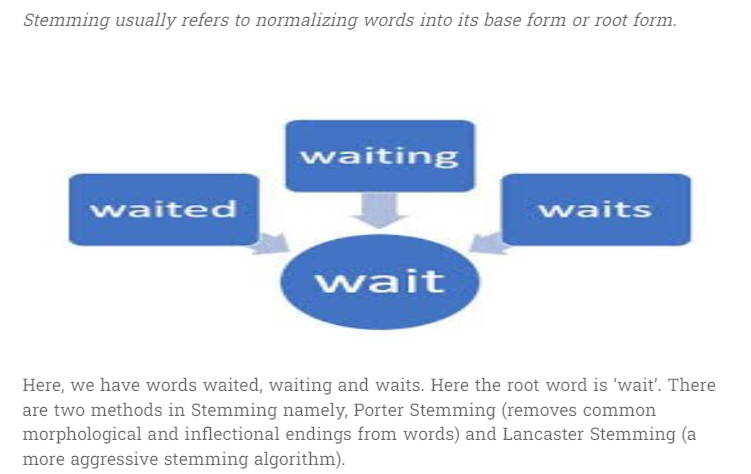
  
-----
  > Errors in Stemming: 
  
>  There are mainly two errors in stemming – Overstemming and Understemming. Overstemming occurs when two words are stemmed from the same root that are of different stems. Under-stemming occurs when two words are stemmed from the same root that is not of different stems.

> Applications of stemming are:

>    Stemming is used in information retrieval systems like search engines.
It is used to determine domain vocabularies in domain analysis.
Stemming is desirable as it may reduce redundancy as most of the time the word stem and their inflected/derived words mean the same.
  
## Lemmatization:
  
  >    Lemmatization seeks to address this issue. This process uses a data structure that relates all forms of a word back to its simplest form, or lemma. Because lemmatization is generally more powerful than stemming, it’s the only normalization strategy offered by spaCy.
  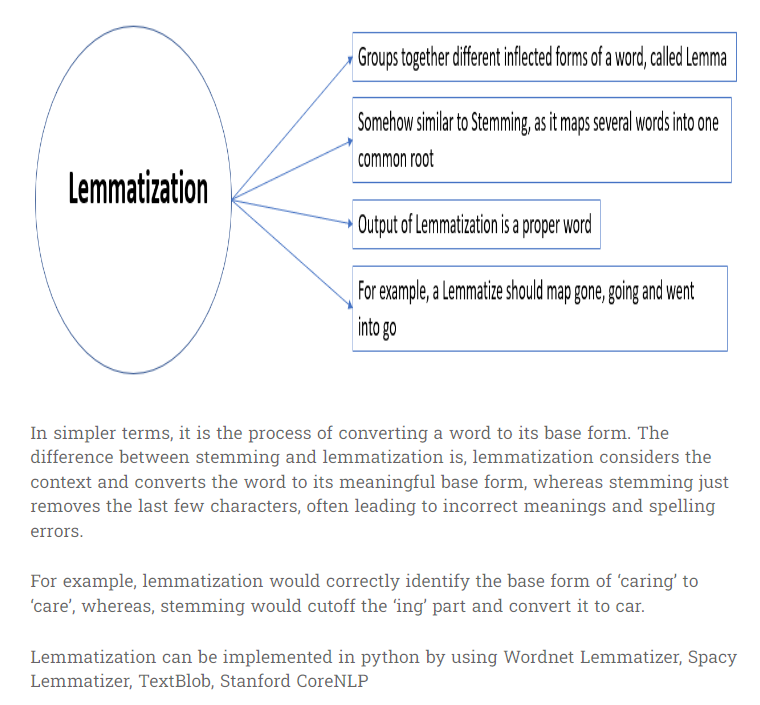

In [65]:
# #Stemming
# from nltk.stem import PorterStemmer
# ps = PorterStemmer()
# stemmed_tokens = [ps.stem(word) for word in lower_string]
# print(stemmed_tokens[0:40])

In [66]:
# Lemmatization
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(''.join(stop_string))
print(doc)

alien ray tracing cyberpunk hdr nextlevel great interview doge underestimated congratulations tesla china amazing execution year happy year ox wfkmyu oj frodo underdoge thought fail haha tweets represent realworld allocation entertaining outcome agree clubhouse rwe uhsts bought dogecoin lil toddler hodler issues sentencing bit high fixing unlock account true power haha uhqsd crypto wallet private keys avoided costs sucks nasa selected falcon heavy launch elements lunar gateway mission pwt predict cash flow starlink ipo starlink staggeringly difficult technical economic endeavor skqx spacex pass deep chasm negative cash flow year hdjl lowest cost ton carbon sequestered net product made scalable qwsgw meant price countries difference taxes shipping intended earth ideas apply mars xprize team manage carbon capture prize ianl tesla receives stock comp stock options table missing back work bit high doge appears inflationary meaningfully fixed coins unit uh rarc wow orbital launch tower stac

In [67]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year', 'ox', 'wfkmyu', 'oj', 'frodo', 'underdoge', 'think', 'fail', 'haha', 'tweet', 'represent', 'realworld', 'allocation', 'entertaining', 'outcome', 'agree', 'clubhouse', 'rwe', 'uhst', 'buy', 'dogecoin', 'lil', 'toddler', 'hodler', 'issue', 'sentencing', 'bit', 'high', 'fix', 'unlock', 'account', 'true', 'power', 'haha', 'uhqsd', 'crypto', 'wallet', 'private', 'key', 'avoid', 'cost', 'suck', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'element', 'lunar', 'gateway', 'mission', 'pwt', 'predict', 'cash', 'flow', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'skqx', 'spacex', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'year', 'hdjl', 'low', 'cost', 'ton', 'carbon', 'sequester', 'net', 'product', 'make', 'scalable', 'qwsgw', 'mean', 'price', '

In [68]:
clean_reviews=' '.join(lemmas)
clean_reviews

'alien ray trace cyberpunk hdr nextlevel great interview doge underestimate congratulation tesla china amazing execution year happy year ox wfkmyu oj frodo underdoge think fail haha tweet represent realworld allocation entertaining outcome agree clubhouse rwe uhst buy dogecoin lil toddler hodler issue sentencing bit high fix unlock account true power haha uhqsd crypto wallet private key avoid cost suck nasa select falcon heavy launch element lunar gateway mission pwt predict cash flow starlink ipo starlink staggeringly difficult technical economic endeavor skqx spacex pass deep chasm negative cash flow year hdjl low cost ton carbon sequester net product make scalable qwsgw mean price country difference taxis ship intend earth idea apply mars xprize team manage carbon capture prize ianl tesla receive stock comp stock option table miss back work bit high doge appear inflationary meaningfully fix coin unit uh rarc wow orbital launch tower stack raptor orbit booster improve ship booster ma

In [69]:
fd_tokens = FreqDist(lemmas)
fd_tokens.most_common(10)

[('tesla', 97),
 ('great', 77),
 ('launch', 64),
 ('make', 64),
 ('haha', 55),
 ('good', 52),
 ('year', 49),
 ('work', 47),
 ('yeah', 41),
 ('dragon', 41)]

In [70]:
pd.DataFrame.from_records([fd_tokens]).T.sort_values(0,ascending=False).head(20)

0
tesla     97
great     77
launch    64
make      64
haha      55
good      52
year      49
work      47
yeah      41
dragon    41
day       38
engine    36
spacex    35
true      35
high      34
starship  33
people    32
car       31
flight    31
test      31

In [71]:
len(fd_tokens)

3295

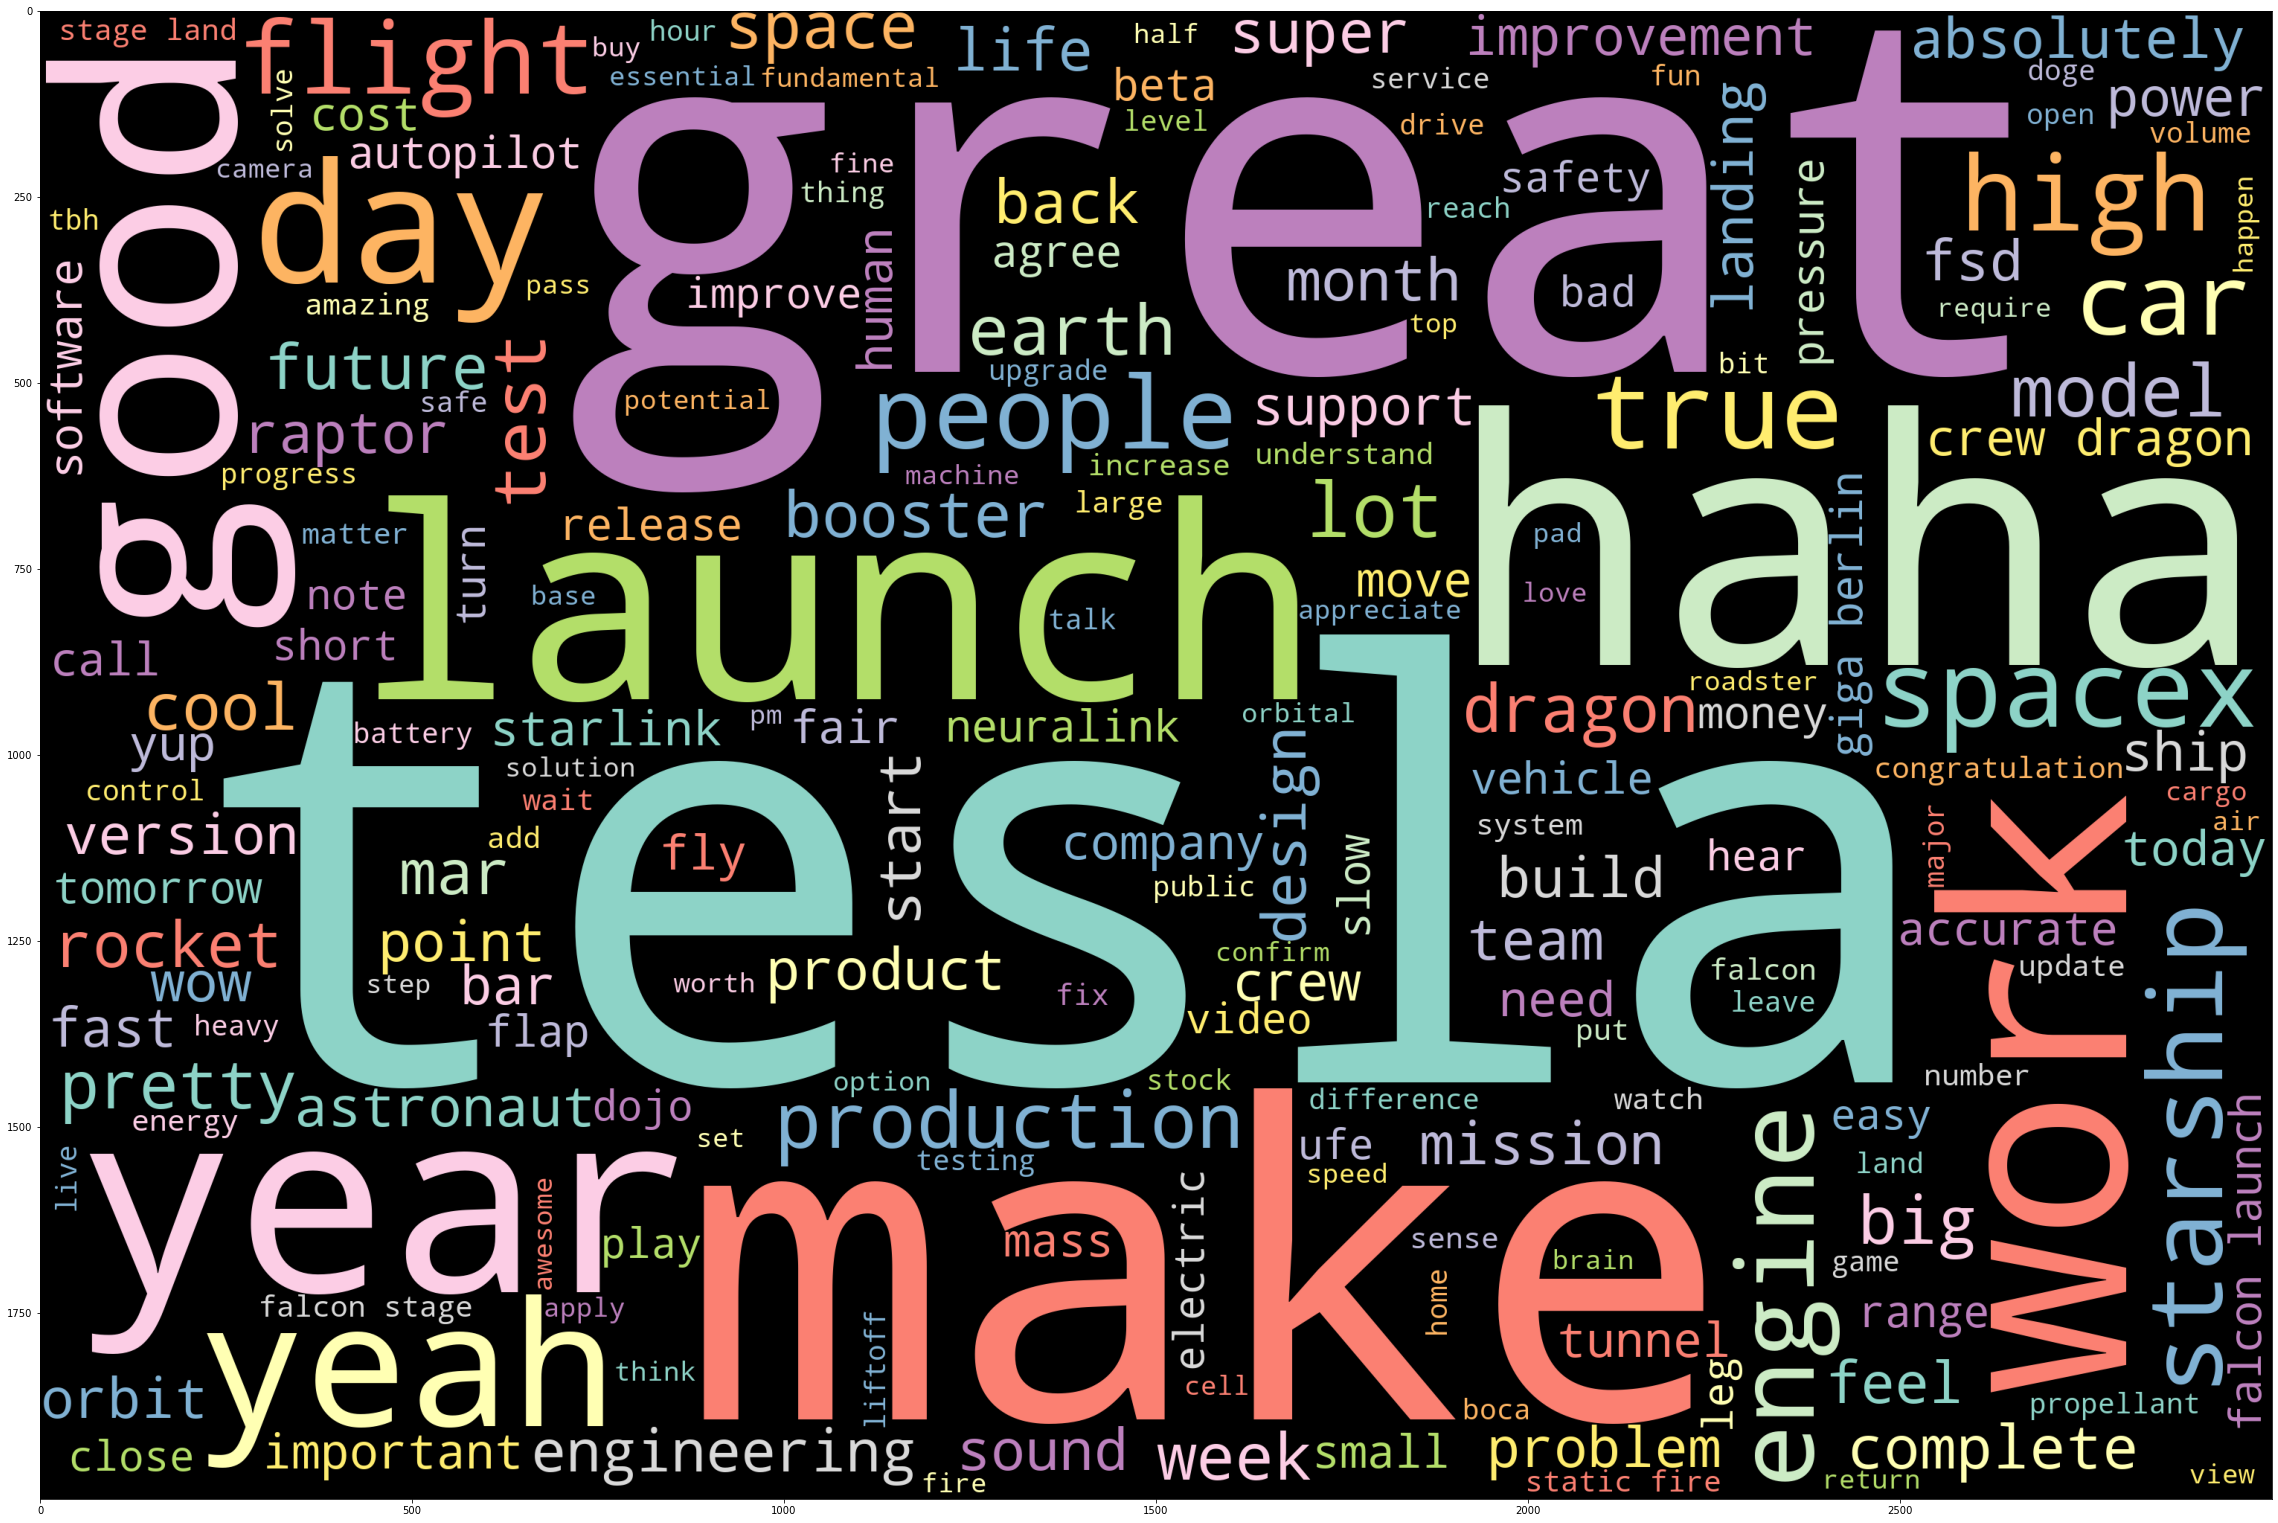

In [72]:
# WordCloud can be performed on the string inputs. That is the reason we have combined entire reviews into single paragraph

plt.figure(figsize=(40,30))
wordcloud_rev = WordCloud(
                      background_color='black',
                      colormap='Set3_r',
                      width=3000,
                      height=2000,
                     ).generate(clean_reviews)

plt.imshow(wordcloud_rev)

## Sentimental Analysis :

In [73]:
# positive words # Choose the path for +ve words stored in system
with open("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A11 Text Mining\\Pos-words.txt","r") as pos:
  pos_words = pos.read().split("\n")
  print(pos_words)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [74]:
len(pos_words)

2007

In [75]:
in_pos_words = [word for word in lemmas if word in pos_words]
print(in_pos_words[0:40])

['great', 'congratulation', 'amazing', 'happy', 'entertaining', 'prize', 'work', 'wow', 'improve', 'work', 'cute', 'fun', 'genius', 'easy', 'work', 'great', 'great', 'wow', 'destiny', 'hot', 'good', 'masterpiece', 'entertain', 'tough', 'progress', 'work', 'super', 'work', 'advanced', 'skill', 'helping', 'good', 'work', 'great', 'correct', 'great', 'instrumental', 'fast', 'important', 'warm']


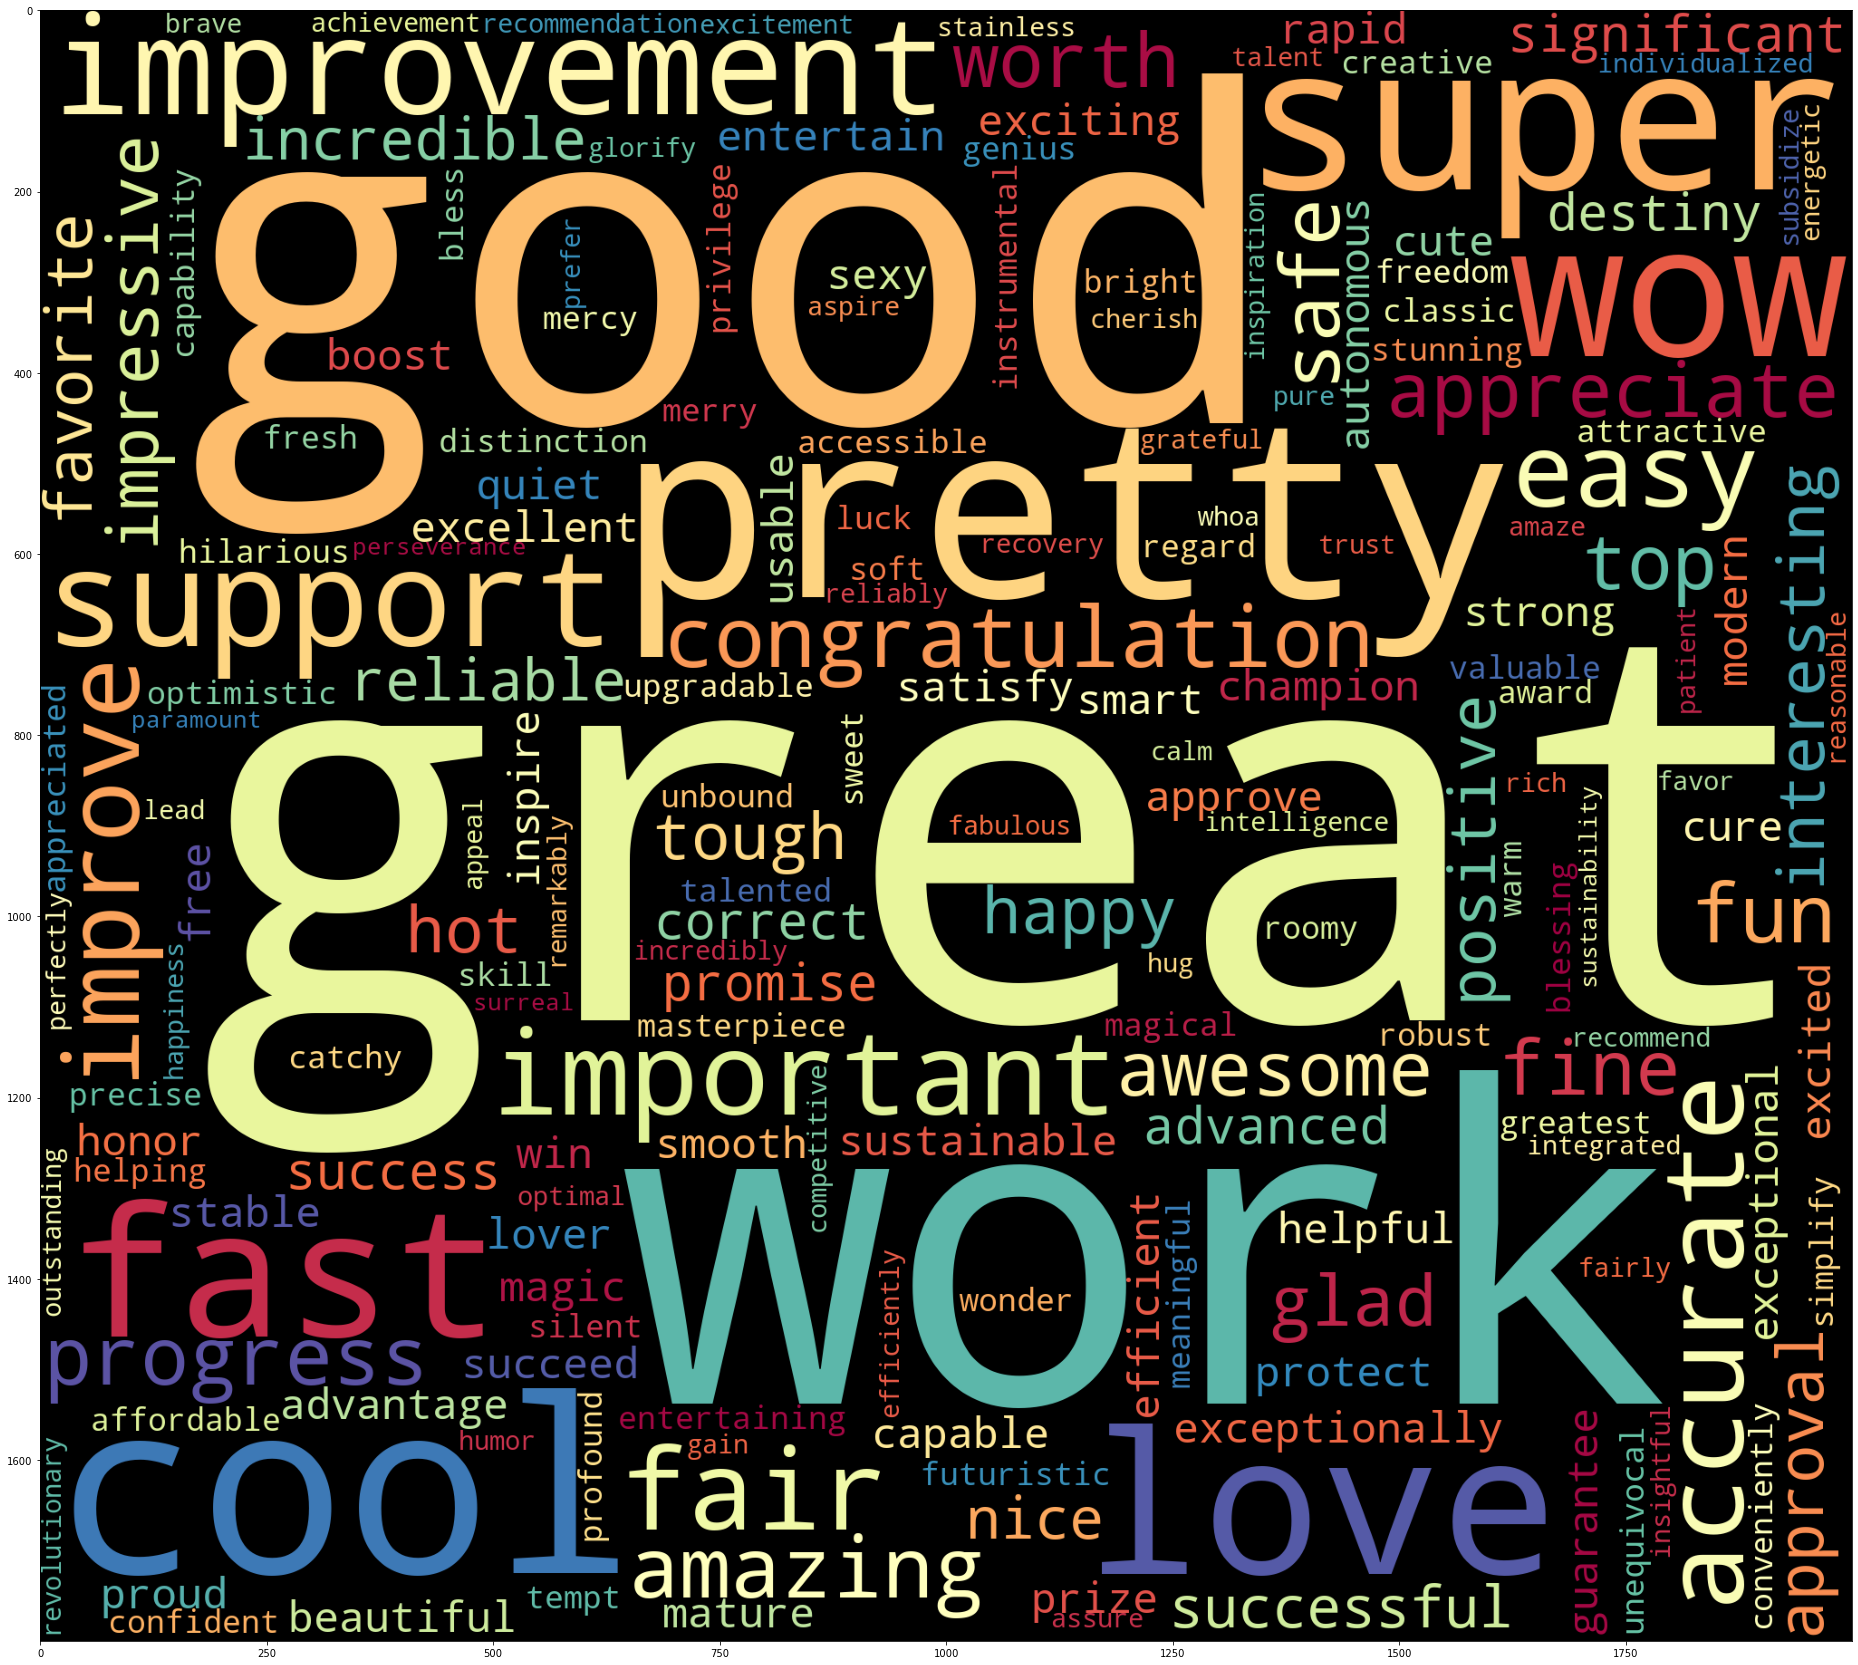

In [76]:
# Positive word cloud
# Choosing the only words which are present in positive words
pos_word_string = " ".join (in_pos_words)

plt.figure(figsize=(40,30))
wordcloud_pos = WordCloud(
                      background_color='black',
                       colormap='Spectral',
                      width=2000,
                      height=1800
                     ).generate(pos_word_string)
plt.imshow(wordcloud_pos)


In [77]:
len(pos_word_string)

5039

In [78]:
fd_pos_tokens = FreqDist(in_pos_words)
fd_pos_tokens.most_common(10)

[('great', 77),
 ('good', 52),
 ('work', 47),
 ('pretty', 22),
 ('cool', 21),
 ('super', 18),
 ('love', 17),
 ('wow', 15),
 ('fast', 14),
 ('improvement', 14)]

In [79]:
len(fd_pos_tokens)

189

In [80]:
# negative words  Choose path for -ve words stored in system
with open("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A11 Text Mining\\Neg-words.txt","r") as neg:
  neg_words = neg.read().split("\n")
  print(neg_words)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [81]:
len(neg_words)

4784

In [82]:
in_neg_words = [word for word in lemmas if word in neg_words]
print(in_neg_words[0:40])

['underestimate', 'fail', 'issue', 'suck', 'difficult', 'negative', 'miss', 'inflationary', 'misleading', 'pain', 'intense', 'mar', 'stranger', 'scratch', 'burn', 'throttle', 'risk', 'foolish', 'destroyer', 'dumb', 'weird', 'injury', 'unusually', 'inevitable', 'die', 'apologists', 'bs', 'break', 'annoy', 'obstacle', 'hedge', 'trap', 'discord', 'wild', 'discord', 'crazy', 'tyranny', 'bad', 'confusion', 'unfavorable']


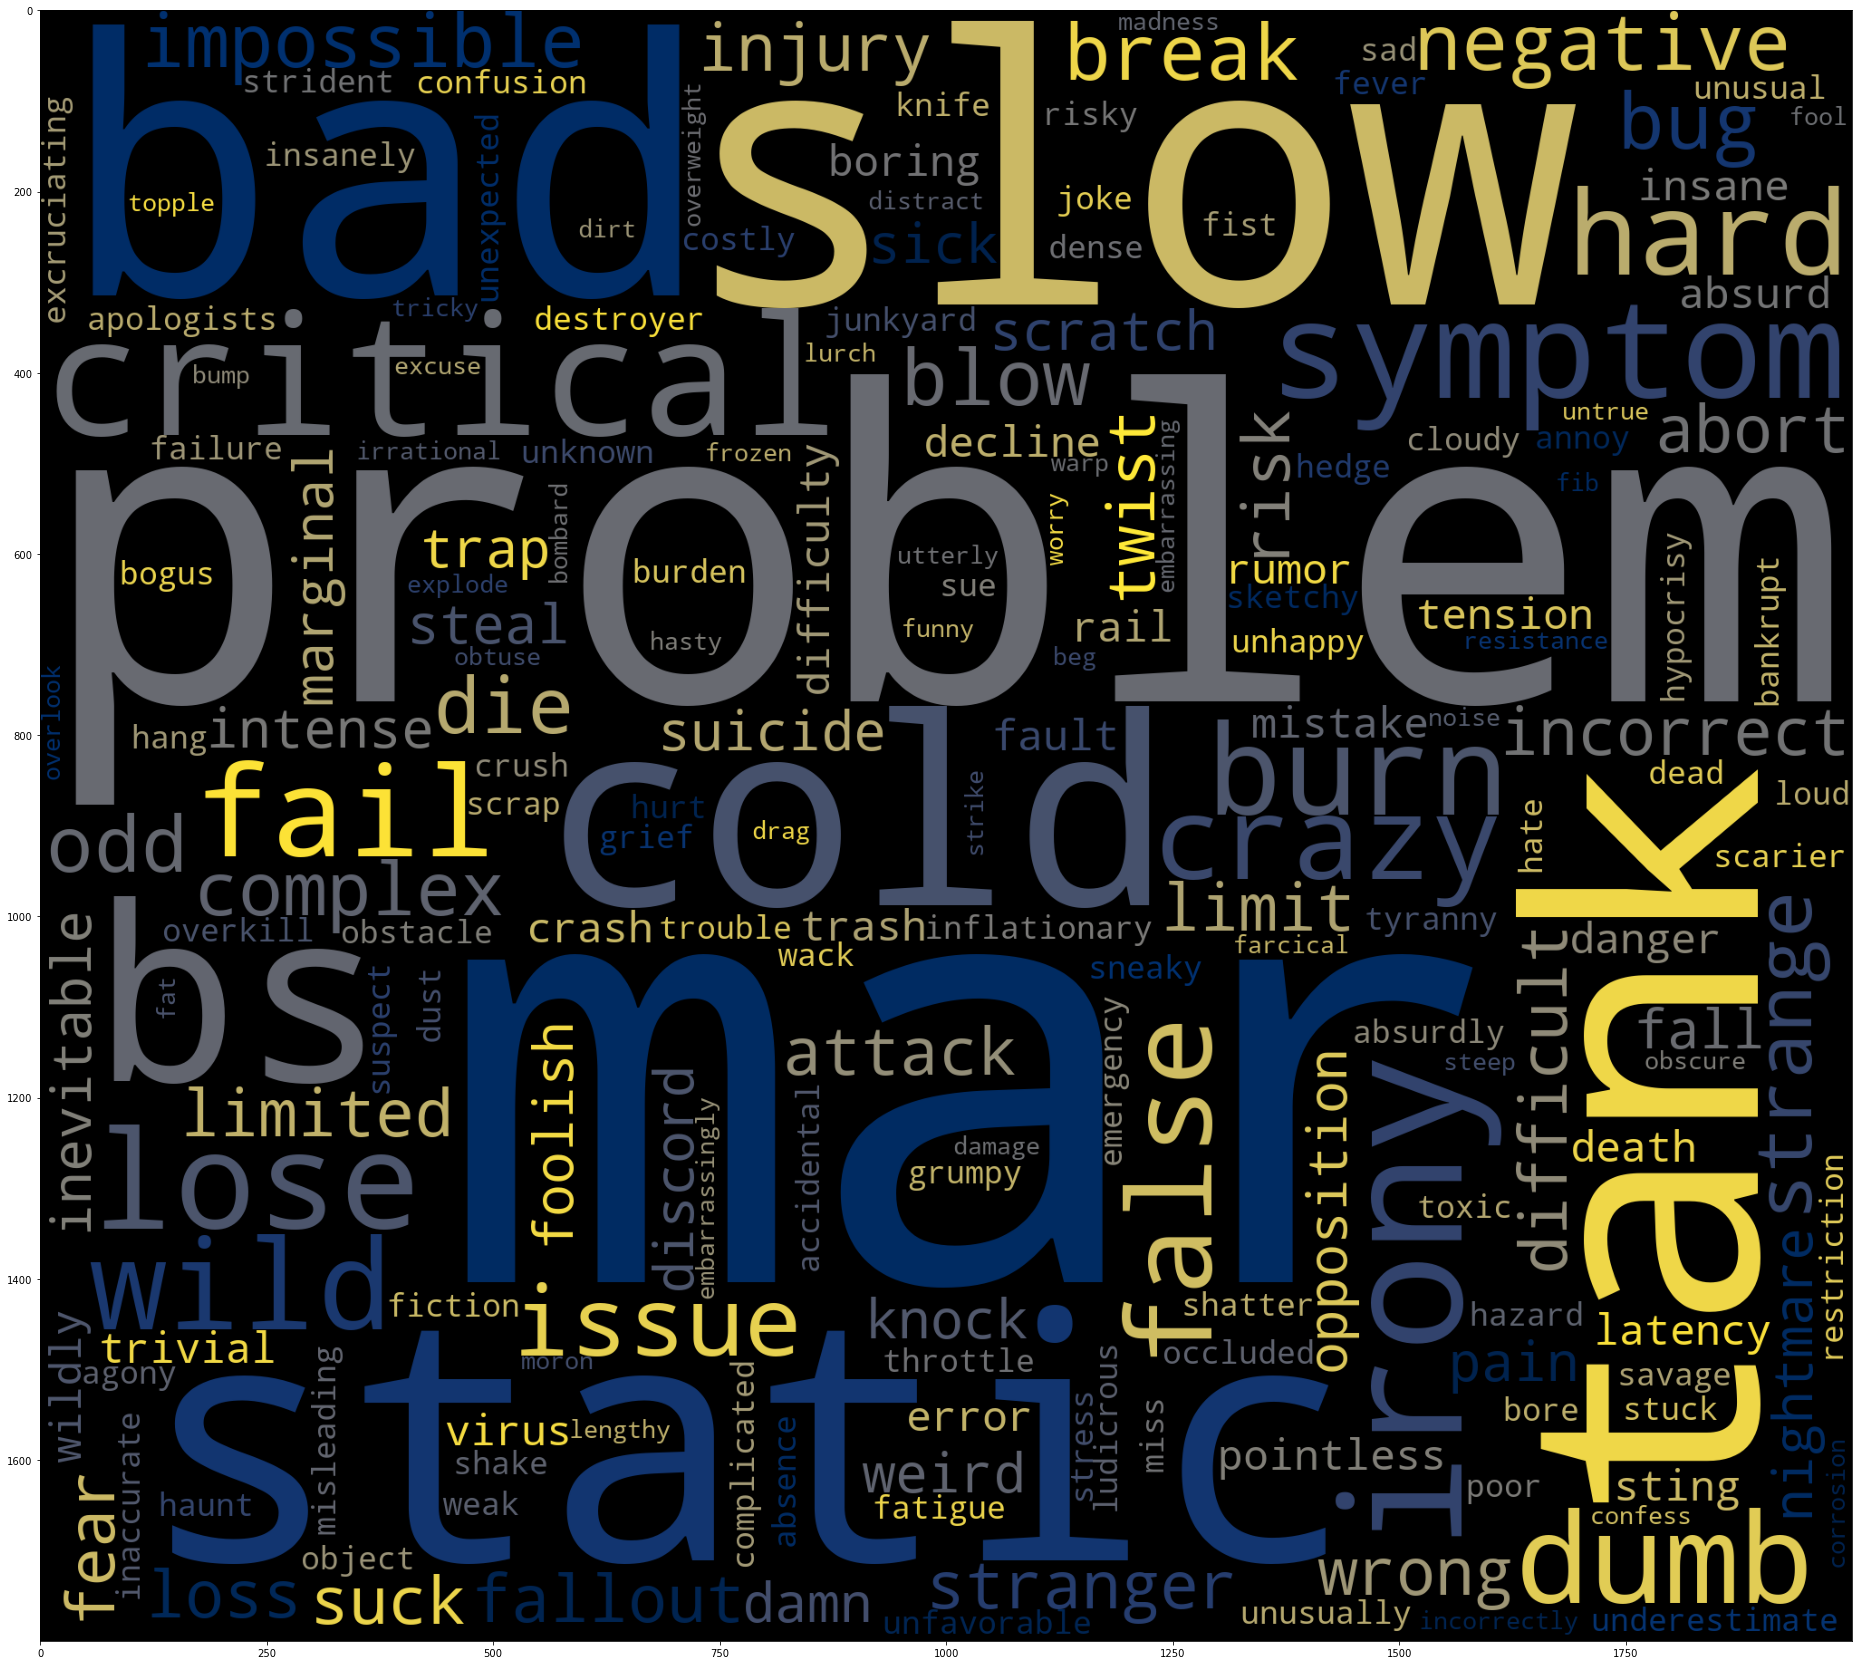

In [83]:
# negative word cloud
# Choosing the only words which are present in negwords
neg_words_string = " ".join (in_neg_words)

plt.figure(figsize=(40,30))
wordcloud_neg = WordCloud(
                      background_color='black',
                      colormap='cividis_r',
                      width=2000,
                      height=1800
                     ).generate(neg_words_string)
plt.imshow(wordcloud_neg)


In [84]:
fd_neg_tokens = FreqDist(in_neg_words)
fd_neg_tokens.most_common(10)

[('mar', 17),
 ('problem', 15),
 ('slow', 11),
 ('bad', 10),
 ('static', 9),
 ('tank', 8),
 ('cold', 7),
 ('bs', 6),
 ('critical', 6),
 ('irony', 6)]

In [85]:
len(fd_neg_tokens)

210

In [86]:
fd_tokens

FreqDist({'tesla': 97, 'great': 77, 'launch': 64, 'make': 64, 'haha': 55, 'good': 52, 'year': 49, 'work': 47, 'yeah': 41, 'dragon': 41, ...})

In [87]:
c = dict(fd_tokens)
for i in c:
  c[i]=0
for i in pos_words:
    if i in c:
        c[i]=1
for o in neg_words:
    if o in c:
        c[o]=-1

In [88]:
c

{'alien': 0,
 'ray': 0,
 'trace': 0,
 'cyberpunk': 0,
 'hdr': 0,
 'nextlevel': 0,
 'great': 1,
 'interview': 0,
 'doge': 0,
 'underestimate': -1,
 'congratulation': 1,
 'tesla': 0,
 'china': 0,
 'amazing': 1,
 'execution': 0,
 'year': 0,
 'happy': 1,
 'ox': 0,
 'wfkmyu': 0,
 'oj': 0,
 'frodo': 0,
 'underdoge': 0,
 'think': 0,
 'fail': -1,
 'haha': 0,
 'tweet': 0,
 'represent': 0,
 'realworld': 0,
 'allocation': 0,
 'entertaining': 1,
 'outcome': 0,
 'agree': 0,
 'clubhouse': 0,
 'rwe': 0,
 'uhst': 0,
 'buy': 0,
 'dogecoin': 0,
 'lil': 0,
 'toddler': 0,
 'hodler': 0,
 'issue': -1,
 'sentencing': 0,
 'bit': 0,
 'high': 0,
 'fix': 0,
 'unlock': 0,
 'account': 0,
 'true': 0,
 'power': 0,
 'uhqsd': 0,
 'crypto': 0,
 'wallet': 0,
 'private': 0,
 'key': 0,
 'avoid': 0,
 'cost': 0,
 'suck': -1,
 'nasa': 0,
 'select': 0,
 'falcon': 0,
 'heavy': 0,
 'launch': 0,
 'element': 0,
 'lunar': 0,
 'gateway': 0,
 'mission': 0,
 'pwt': 0,
 'predict': 0,
 'cash': 0,
 'flow': 0,
 'starlink': 0,
 'ipo': 0,


In [89]:
file = pd.DataFrame(list(c.items()), columns = ["Words","Sentiment_Score"])
file

Words  Sentiment_Score
0          alien                0
1            ray                0
2          trace                0
3      cyberpunk                0
4            hdr                0
...          ...              ...
3290  propaganda               -1
3291      social                0
3292       click                0
3293     samwise                0
3294      gamgee                0

[3295 rows x 2 columns]

In [90]:
file["Sentiment_Score"].unique()

array([ 0,  1, -1], dtype=int64)

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment_Score', ylabel='count'>

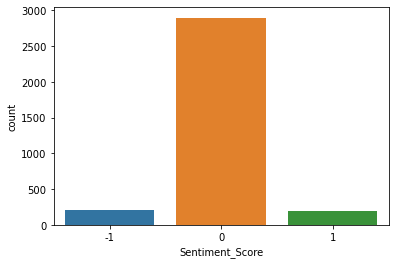

In [91]:
sns.countplot(file["Sentiment_Score"])

In [92]:
x = file["Sentiment_Score"].value_counts()
x

 0    2896
-1     210
 1     189
Name: Sentiment_Score, dtype: int64

In [93]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Words            3295 non-null   object
 1   Sentiment_Score  3295 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 51.6+ KB


In [94]:
x_file = pd.DataFrame(list(x.items()) ,  columns = ["Sentiment_Score","Counts"])
x_file

Sentiment_Score  Counts
0                0    2896
1               -1     210
2                1     189

### Another way to find positive and negative words:

In [95]:
sen = SentimentIntensityAnalyzer()

Sentiment_scores = []
for i in lemmas:
    Sentiment_scores.append(sen.polarity_scores(i))
    
# Created a resultant list of score values
Sentiment_scores[:10]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.296}]

In [96]:
type(Sentiment_scores)

list

In [98]:
len(Sentiment_scores)

8001

In [99]:
df_sent = pd.DataFrame(Sentiment_scores)
df_sent.drop(['compound'], axis=1, inplace=True)

d = {'Sentiment': ['negatives', 'neutrals', 'positives'], 
     'Sum of Sentiment': [int(df_sent['neg'].sum()), int(df_sent['neu'].sum()), int(df_sent['pos'].sum())]}

scores_df = pd.DataFrame(d, columns = ['Sentiment', 'Sum of Sentiment'])
scores_df

Sentiment  Sum of Sentiment
0  negatives               291
1   neutrals              6798
2  positives               912

In [100]:
df_sent = pd.DataFrame(Sentiment_scores)
df_sent.drop(['compound'], axis=1, inplace=True)

d = {'Sentiment': ['negatives', 'neutrals', 'positives'], 
     'Average of Sentiment': [(df_sent['neg'].mean()), (df_sent['neu'].mean()), (df_sent['pos'].mean())]}

scores_df = pd.DataFrame(d, columns = ['Sentiment', 'Average of Sentiment'])
scores_df

Sentiment  Average of Sentiment
0  negatives              0.036370
1   neutrals              0.849644
2  positives              0.113986